In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from pandas import read_csv

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt

In [2]:
#load datasets
data = pd.read_csv('data_for_modeling_balanced_data.csv')
data.head()

,MONTH,LONGITUDE,LATITUDE,UNIT_COUNT,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,FIRE_ALARM,ZONING
0,10,-121.890630,37.338165,1,120.0,61031,4.50125,248.75,251.25,15.0250,20.4875,0.054929,113,693,1,5
1,1,-121.858591,37.318293,1,135.0,62791,4.67000,223.75,222.50,14.1875,18.1125,0.020094,10,123,1,5
2,4,-121.865130,37.242801,2,141.0,49526,4.36000,262.50,257.50,14.8750,20.5375,0.087224,112,335,1,0
3,5,-121.888838,37.338055,1,117.0,52969,3.91375,228.75,206.25,14.4000,19.5125,0.049987,273,1457,1,1
4,3,-121.863820,37.303570,1,114.0,58643,5.20125,197.50,201.25,13.3250,17.6625,0.033201,11,48,1,0


In [3]:
data

,MONTH,LONGITUDE,LATITUDE,UNIT_COUNT,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,FIRE_ALARM,ZONING
0,10,-121.890630,37.338165,1,120.0,61031,4.50125,248.75,251.25,15.0250,20.4875,0.054929,113,693,1,5
1,1,-121.858591,37.318293,1,135.0,62791,4.67000,223.75,222.50,14.1875,18.1125,0.020094,10,123,1,5
2,4,-121.865130,37.242801,2,141.0,49526,4.36000,262.50,257.50,14.8750,20.5375,0.087224,112,335,1,0
3,5,-121.888838,37.338055,1,117.0,52969,3.91375,228.75,206.25,14.4000,19.5125,0.049987,273,1457,1,1
4,3,-121.863820,37.303570,1,114.0,58643,5.20125,197.50,201.25,13.3250,17.6625,0.033201,11,48,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,9,-121.860907,37.327850,16,140.0,51442,4.41750,216.25,208.75,13.1875,17.3875,0.017421,8,10,3,5
7187,9,-121.806332,37.236556,16,125.0,49449,4.75500,221.25,207.50,13.9375,19.1875,0.020105,43,167,3,0
7188,9,-121.835183,37.393915,18,127.0,50832,4.92125,213.75,216.25,13.9125,17.5250,0.008847,22,49,3,0
7189,9,-121.890154,37.336557,24,110.0,50764,4.92125,213.75,216.25,13.9125,17.5250,0.008847,397,917,3,1


In [4]:
data.isna().sum()

MONTH                      0
LONGITUDE                  0
LATITUDE                   0
UNIT_COUNT                 0
NDVI_MEAN                  0
LST_MEAN                   0
AWND                       0
WDF2                       0
WDF5                       0
WSF2                       0
WSF5                       0
PRCP                       0
HOUSES_WITHIN_100_METER    0
HOUSES_WITHIN_200_METER    0
FIRE_ALARM                 0
ZONING                     0
dtype: int64

In [5]:
d1= data.drop(['UNIT_COUNT'], axis=1)

In [6]:
d1.FIRE_ALARM.value_counts()

1    4086
2    2724
3     381
Name: FIRE_ALARM, dtype: int64

In [7]:
X = d1.drop('FIRE_ALARM', axis=1)

In [8]:
X

,MONTH,LONGITUDE,LATITUDE,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,ZONING
0,10,-121.890630,37.338165,120.0,61031,4.50125,248.75,251.25,15.0250,20.4875,0.054929,113,693,5
1,1,-121.858591,37.318293,135.0,62791,4.67000,223.75,222.50,14.1875,18.1125,0.020094,10,123,5
2,4,-121.865130,37.242801,141.0,49526,4.36000,262.50,257.50,14.8750,20.5375,0.087224,112,335,0
3,5,-121.888838,37.338055,117.0,52969,3.91375,228.75,206.25,14.4000,19.5125,0.049987,273,1457,1
4,3,-121.863820,37.303570,114.0,58643,5.20125,197.50,201.25,13.3250,17.6625,0.033201,11,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,9,-121.860907,37.327850,140.0,51442,4.41750,216.25,208.75,13.1875,17.3875,0.017421,8,10,5
7187,9,-121.806332,37.236556,125.0,49449,4.75500,221.25,207.50,13.9375,19.1875,0.020105,43,167,0
7188,9,-121.835183,37.393915,127.0,50832,4.92125,213.75,216.25,13.9125,17.5250,0.008847,22,49,0
7189,9,-121.890154,37.336557,110.0,50764,4.92125,213.75,216.25,13.9125,17.5250,0.008847,397,917,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.07599452, -0.50768722,  0.37672997, ...,  0.88204761,
         2.4632089 ,  0.86158221],
       [-1.70649196,  0.15229158, -0.06983916, ..., -0.58065509,
        -0.33275479,  0.86158221],
       [-0.77899647,  0.0175932 , -1.76631645, ...,  0.86784661,
         0.7071475 , -1.90531564],
       ...,
       [ 0.76682935,  0.63447841,  1.62955953, ..., -0.41024313,
        -0.69573955, -1.90531564],
       [ 0.76682935, -0.49788198,  0.34059454, ...,  4.91513077,
         3.56197358, -1.35193607],
       [ 0.76682935,  0.28902929, -1.31716301, ..., -0.39604213,
        -0.40633278,  0.30820264]])

In [10]:
Standard_data_df = pd.DataFrame(X_scaled,columns = d1.columns[0:14])

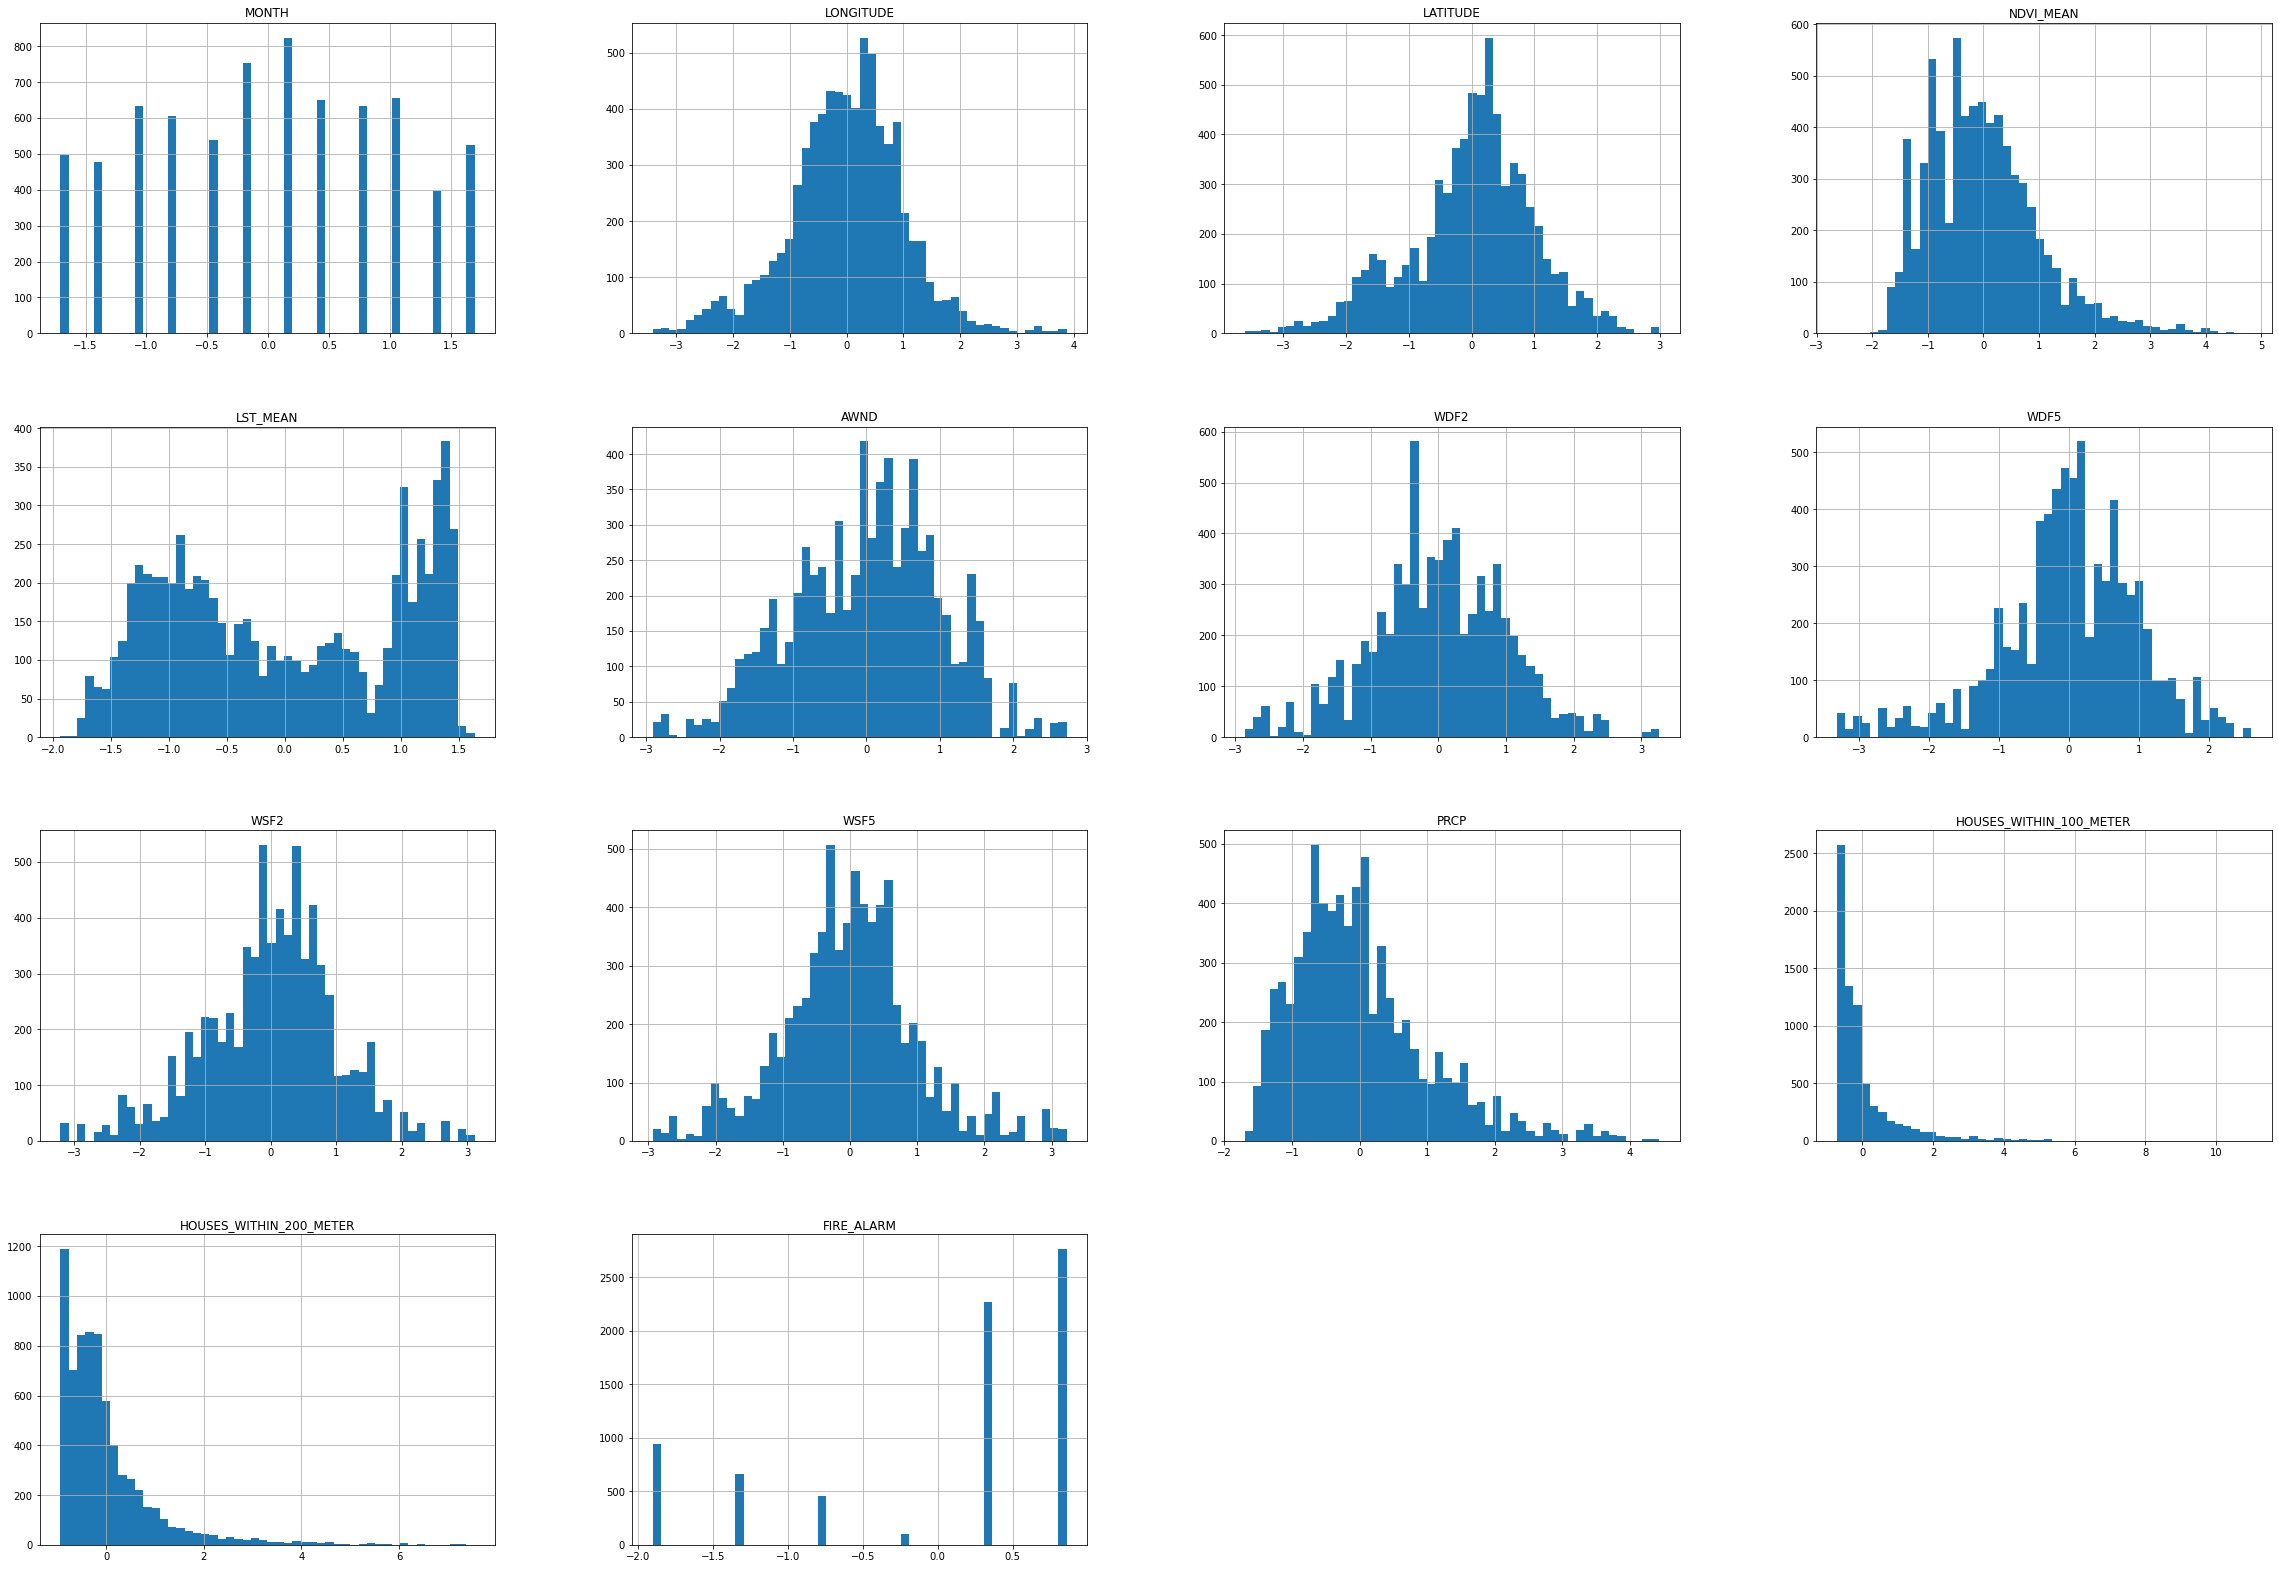

In [11]:
Standard_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [12]:
y = d1['FIRE_ALARM']

In [13]:
X["ZONING"].unique()

array([5, 0, 1, 4, 2, 3], dtype=int64)

In [14]:
X

,MONTH,LONGITUDE,LATITUDE,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,ZONING
0,10,-121.890630,37.338165,120.0,61031,4.50125,248.75,251.25,15.0250,20.4875,0.054929,113,693,5
1,1,-121.858591,37.318293,135.0,62791,4.67000,223.75,222.50,14.1875,18.1125,0.020094,10,123,5
2,4,-121.865130,37.242801,141.0,49526,4.36000,262.50,257.50,14.8750,20.5375,0.087224,112,335,0
3,5,-121.888838,37.338055,117.0,52969,3.91375,228.75,206.25,14.4000,19.5125,0.049987,273,1457,1
4,3,-121.863820,37.303570,114.0,58643,5.20125,197.50,201.25,13.3250,17.6625,0.033201,11,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,9,-121.860907,37.327850,140.0,51442,4.41750,216.25,208.75,13.1875,17.3875,0.017421,8,10,5
7187,9,-121.806332,37.236556,125.0,49449,4.75500,221.25,207.50,13.9375,19.1875,0.020105,43,167,0
7188,9,-121.835183,37.393915,127.0,50832,4.92125,213.75,216.25,13.9125,17.5250,0.008847,22,49,0
7189,9,-121.890154,37.336557,110.0,50764,4.92125,213.75,216.25,13.9125,17.5250,0.008847,397,917,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(Standard_data_df, y, test_size=0.3, random_state=42)

In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=20)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.6169261898980001

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.629286376274328

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.629286376274328

## Feature Selection

MONTH                      0.000000
LONGITUDE                  0.058184
LATITUDE                   0.052473
NDVI_MEAN                  0.007347
LST_MEAN                   0.022742
AWND                       0.008073
WDF2                       0.005763
WDF5                       0.005158
WSF2                       0.003318
WSF5                       0.007228
PRCP                       0.000000
HOUSES_WITHIN_100_METER    0.025513
HOUSES_WITHIN_200_METER    0.026315
FIRE_ALARM                 0.055401
dtype: float64


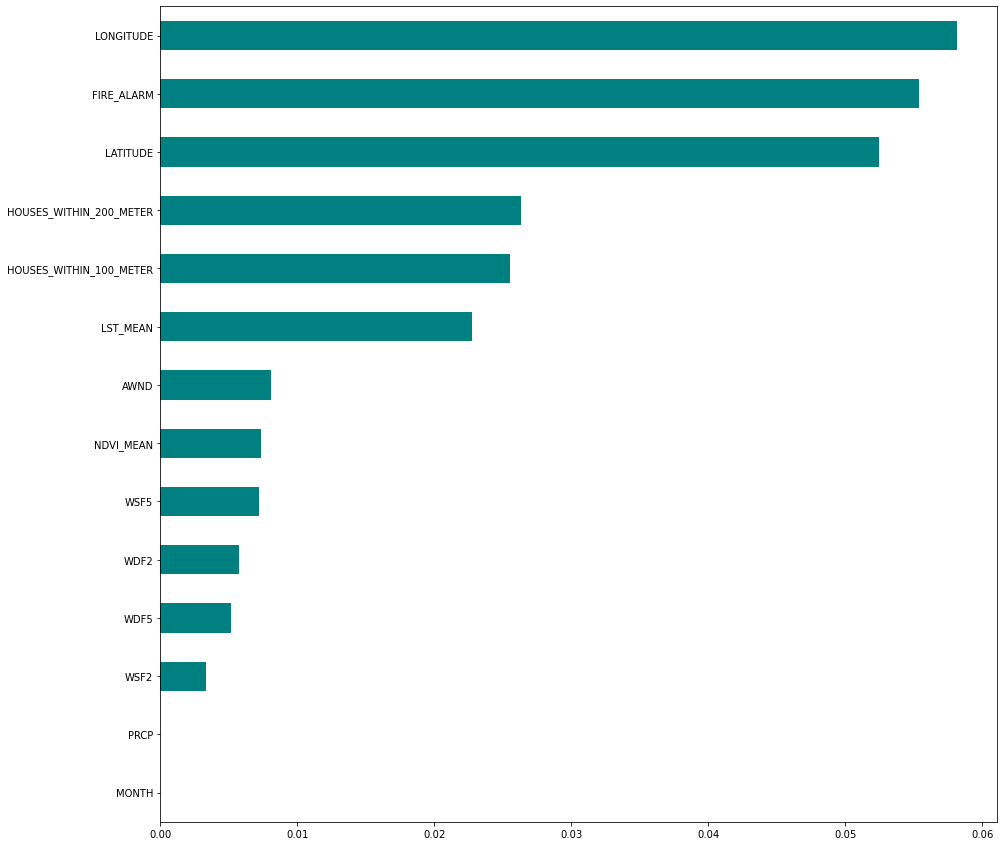

In [31]:
from sklearn.feature_selection import mutual_info_classif

importance= mutual_info_classif(X,y,random_state=42)
feature_important=pd.Series(importance,d1.columns[0:len(d1.columns)-1])
print(feature_important)
plt.figure(figsize = (15,15))
feature_important.sort_values(ascending=True).plot(kind='barh',color='teal')
plt.show()

In [21]:
# These features will be dropped with 97% confidence (feature_important> 0.03)
Columns_Info_gain = feature_important[feature_important>=0.03].index
Columns_Info_gain

Index(['LONGITUDE', 'LATITUDE', 'FIRE_ALARM'], dtype='object')

In [22]:
d1

,MONTH,LONGITUDE,LATITUDE,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,FIRE_ALARM,ZONING
0,10,-121.890630,37.338165,120.0,61031,4.50125,248.75,251.25,15.0250,20.4875,0.054929,113,693,1,5
1,1,-121.858591,37.318293,135.0,62791,4.67000,223.75,222.50,14.1875,18.1125,0.020094,10,123,1,5
2,4,-121.865130,37.242801,141.0,49526,4.36000,262.50,257.50,14.8750,20.5375,0.087224,112,335,1,0
3,5,-121.888838,37.338055,117.0,52969,3.91375,228.75,206.25,14.4000,19.5125,0.049987,273,1457,1,1
4,3,-121.863820,37.303570,114.0,58643,5.20125,197.50,201.25,13.3250,17.6625,0.033201,11,48,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,9,-121.860907,37.327850,140.0,51442,4.41750,216.25,208.75,13.1875,17.3875,0.017421,8,10,3,5
7187,9,-121.806332,37.236556,125.0,49449,4.75500,221.25,207.50,13.9375,19.1875,0.020105,43,167,3,0
7188,9,-121.835183,37.393915,127.0,50832,4.92125,213.75,216.25,13.9125,17.5250,0.008847,22,49,3,0
7189,9,-121.890154,37.336557,110.0,50764,4.92125,213.75,216.25,13.9125,17.5250,0.008847,397,917,3,1


In [23]:
selected_features=Standard_data_df.drop(['PRCP', 'MONTH'],axis=1)

In [24]:
Standard_data_df

,MONTH,LONGITUDE,LATITUDE,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,PRCP,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,FIRE_ALARM
0,1.075995,-0.507687,0.376730,-0.177067,1.016948,0.471118,1.804489,1.792887,1.461989,1.584567,0.104246,0.882048,2.463209,0.861582
1,-1.706492,0.152292,-0.069839,0.939855,1.288743,0.709872,0.640436,0.552698,0.881738,0.447265,-1.040800,-0.580655,-0.332755,0.861582
2,-0.778996,0.017593,-1.766316,1.386623,-0.759755,0.271272,2.444718,2.062493,1.358063,1.608510,1.165811,0.867847,0.707147,-1.905316
3,-0.469831,-0.470773,0.374258,-0.400452,-0.228057,-0.360099,0.873247,-0.148278,1.028966,1.117674,-0.058188,3.154207,6.210781,-1.351936
4,-1.088162,0.044578,-0.400699,-0.623836,0.648172,1.461505,-0.581819,-0.363963,0.284167,0.231776,-0.609964,-0.566454,-0.700645,-1.905316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,0.766829,0.104584,0.144928,1.312162,-0.463870,0.352626,0.291220,-0.040435,0.188902,0.100088,-1.128661,-0.609057,-0.887042,0.861582
7187,0.766829,1.228787,-1.906656,0.195240,-0.771646,0.830134,0.524031,-0.094357,0.708529,0.962044,-1.040414,-0.112022,-0.116926,-1.905316
7188,0.766829,0.634478,1.629560,0.344163,-0.558071,1.065351,0.174815,0.283092,0.691208,0.165932,-1.410465,-0.410243,-0.695740,-1.905316
7189,0.766829,-0.497882,0.340595,-0.921682,-0.568572,1.065351,0.174815,0.283092,0.691208,0.165932,-1.410465,4.915131,3.561974,-1.351936


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.3, random_state=42)

In [26]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)


In [27]:
selected_features

,LONGITUDE,LATITUDE,NDVI_MEAN,LST_MEAN,AWND,WDF2,WDF5,WSF2,WSF5,HOUSES_WITHIN_100_METER,HOUSES_WITHIN_200_METER,FIRE_ALARM
0,-0.507687,0.376730,-0.177067,1.016948,0.471118,1.804489,1.792887,1.461989,1.584567,0.882048,2.463209,0.861582
1,0.152292,-0.069839,0.939855,1.288743,0.709872,0.640436,0.552698,0.881738,0.447265,-0.580655,-0.332755,0.861582
2,0.017593,-1.766316,1.386623,-0.759755,0.271272,2.444718,2.062493,1.358063,1.608510,0.867847,0.707147,-1.905316
3,-0.470773,0.374258,-0.400452,-0.228057,-0.360099,0.873247,-0.148278,1.028966,1.117674,3.154207,6.210781,-1.351936
4,0.044578,-0.400699,-0.623836,0.648172,1.461505,-0.581819,-0.363963,0.284167,0.231776,-0.566454,-0.700645,-1.905316
...,...,...,...,...,...,...,...,...,...,...,...,...
7186,0.104584,0.144928,1.312162,-0.463870,0.352626,0.291220,-0.040435,0.188902,0.100088,-0.609057,-0.887042,0.861582
7187,1.228787,-1.906656,0.195240,-0.771646,0.830134,0.524031,-0.094357,0.708529,0.962044,-0.112022,-0.116926,-1.905316
7188,0.634478,1.629560,0.344163,-0.558071,1.065351,0.174815,0.283092,0.691208,0.165932,-0.410243,-0.695740,-1.905316
7189,-0.497882,0.340595,-0.921682,-0.568572,1.065351,0.174815,0.283092,0.691208,0.165932,4.915131,3.561974,-1.351936


In [28]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.59716885751843

In [29]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.6362372567191844

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.6362372567191844